In [1]:
import numpy as np
import pandas as pd


import psycopg2
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta  

import sys
import os
import re

In [2]:
param_dic = {
    "host"      : "localhost",
    "database"  : "bachelorBesoeg2014",
    "user"      : "postgres",
    "password"  : "password",
    "port"      : "5432"
}

def execRangeQuery(params_dic,dates):
    query = """
    SELECT
    sum(count_)
    FROM _775147
    WHERE
    time_ >= '{date0}'
    AND time_ <=  '{date1}'
    ;
    """.format(date0 = dates[0], date1 = dates[1])
    try:
        connection = psycopg2.connect(**params_dic)
        cursor = connection.cursor()
        cursor.execute(query)
        record = cursor.fetchall()
        return record
    except (Exception, psycopg2.Error) as error :
        connection = False
        print ("Error while connecting to PostgreSQL", error)
    finally:
        if(connection):
            cursor.close()
            connection.close()
            print("Executed query and closed connection.")

def execQuery(params_dic,query):
    try:
        connection = psycopg2.connect(**params_dic)
        cursor = connection.cursor()
        cursor.execute(query)
        record = cursor.fetchall()
        return record
    except (Exception, psycopg2.Error) as error :
        connection = False
        print ("Error while connecting to PostgreSQL", error)
    finally:
        if(connection):
            cursor.close()
            connection.close()
            print("Executed query and closed connection.")
#"""select count(*) as number_of_dates, count(DISTINCT  count_) as distinct_count from _775147;"""
range_dates = ('2014-01-02','2014-01-9') 
correct_answer = execRangeQuery(param_dic, range_dates)[0][0]
print(correct_answer)

Executed query and closed connection.
1681


In [3]:
onlydirs = [f for f in os.listdir(os.getcwd()) if os.path.isdir(os.path.join(os.getcwd(), f)) and f[0] != '.']

In [4]:
onlydirs

['Data', 'plots', 'results']

In [5]:
os.chdir(os.getcwd()+'/'+'results/local_flat_freq')
os.getcwd()

'C:\\Users\\Jonas Friis\\Documents\\Universitet\\Bachelors-Thesis\\Implementation\\results\\local_flat_freq'

In [6]:
files = [f for f in os.listdir('.') if re.match(r'(flat_freq).*\.csv', f)]
files

['flat_freq_e=0.3_N=1024.csv',
 'flat_freq_e=0.3_N=128.csv',
 'flat_freq_e=0.3_N=2048.csv',
 'flat_freq_e=0.3_N=256.csv',
 'flat_freq_e=0.3_N=32.csv',
 'flat_freq_e=0.3_N=512.csv',
 'flat_freq_e=0.8_N=1024.csv',
 'flat_freq_e=0.8_N=128.csv',
 'flat_freq_e=0.8_N=2048.csv',
 'flat_freq_e=0.8_N=256.csv',
 'flat_freq_e=0.8_N=32.csv',
 'flat_freq_e=0.8_N=512.csv',
 'flat_freq_e=1.0_N=1024.csv',
 'flat_freq_e=1.0_N=128.csv',
 'flat_freq_e=1.0_N=2048.csv',
 'flat_freq_e=1.0_N=256.csv',
 'flat_freq_e=1.0_N=32.csv',
 'flat_freq_e=1.0_N=512.csv',
 'flat_freq_e=1.2_N=1024.csv',
 'flat_freq_e=1.2_N=128.csv',
 'flat_freq_e=1.2_N=2048.csv',
 'flat_freq_e=1.2_N=256.csv',
 'flat_freq_e=1.2_N=32.csv',
 'flat_freq_e=1.2_N=512.csv',
 'flat_freq_e=1.4_N=1024.csv',
 'flat_freq_e=1.4_N=128.csv',
 'flat_freq_e=1.4_N=2048.csv',
 'flat_freq_e=1.4_N=256.csv',
 'flat_freq_e=1.4_N=32.csv',
 'flat_freq_e=1.4_N=512.csv',
 'flat_freq_e=2.0_N=1024.csv',
 'flat_freq_e=2.0_N=128.csv',
 'flat_freq_e=2.0_N=2048.csv',
 'f

In [7]:
epsilons = np.array([2,1.4,1,0.8,0.3])
n = np.array([32,128,512,2048])

epsilon_2 = []
epsilon_14 = []
epsilon_1 = []
epsilon_08 = []
epsilon_03 = []

n_32 = []
n_128 = []
n_512 = []
n_2048 = []


for f in files:
    if 'e=2' in f:
        epsilon_2.append(np.genfromtxt(f, delimiter=','))
    if 'e=1.4' in f:
        epsilon_14.append(np.genfromtxt(f, delimiter=','))
    if 'e=1.0' in f:
        epsilon_1.append(np.genfromtxt(f, delimiter=','))
    if 'e=0.8' in f:
        epsilon_08.append(np.genfromtxt(f, delimiter=','))
    if 'e=0.3' in f:
        epsilon_03.append(np.genfromtxt(f, delimiter=','))
    if 'N=32' in f:
        n_32.append(np.genfromtxt(f, delimiter=','))
    if 'N=128' in f:
        n_128.append(np.genfromtxt(f, delimiter=','))
    if 'N=512' in f:
        n_512.append(np.genfromtxt(f, delimiter=','))
    if 'N=2048' in f:
        n_2048.append(np.genfromtxt(f, delimiter=','))

        
epsilon_2 = np.array([item for sublist in epsilon_2 for item in sublist])
epsilon_14 = np.array([item for sublist in epsilon_14 for item in sublist])
epsilon_1 = np.array([item for sublist in epsilon_1 for item in sublist])
epsilon_08 = np.array([item for sublist in epsilon_08 for item in sublist])
epsilon_03 = np.array([item for sublist in epsilon_03 for item in sublist])


n_32 = np.array([item for sublist in n_32 for item in sublist])
n_128 = np.array([item for sublist in n_128 for item in sublist])
n_512 = np.array([item for sublist in n_512 for item in sublist])
n_2048 = np.array([item for sublist in n_2048 for item in sublist])

epsilons_res = [epsilon_2 ,epsilon_14, epsilon_1, epsilon_08, epsilon_03]
ns = [n_32, n_128, n_512, n_2048]

In [8]:
def same_parameter(answers, correct_answer):
    error = np.abs(correct_answer-answers)
    max_error = np.amax(error)
    min_error = np.amin(error)
    true_values = np.full(len(answers), correct_answer)
    mse = mean_squared_error(true_values, answers, squared = False)
    error_dict = {'mse': mse, 'max': max_error, 'min': min_error, 'abs': np.mean(error)}
    
    return error_dict


In [19]:
#Getting all error values from dict
def dict_error_plot_epsilons(dic, plotname, epsilons):
    n = len(dic)
    mse_errors = np.zeros(n)
    max_errors = np.zeros(n)
    abs_errors = np.zeros(n)

    for num, item in enumerate(dic.items()):
        mse_errors[num] = item[1]['mse']
        max_errors[num] = item[1]['max']
        abs_errors[num] = item[1]['abs']

    error_stack = np.vstack((mse_errors,max_errors,abs_errors)).flatten()
    mse_labels = np.full(mse_errors.size, 'mse errors')
    max_labels = np.full(max_errors.size, 'max errors')
    abs_labels = np.full(abs_errors.size, 'abs errors')


    labels_stack = np.vstack((mse_labels,max_labels,abs_labels)).flatten()
    epsilons_stack = np.vstack((epsilons,epsilons,epsilons)).flatten()

    seaborn_df = pd.DataFrame({'epsilons':epsilons_stack, 'errors':error_stack,'labels':labels_stack})
    seaborn_df.to_csv(plotname + '_olh_seaborn_plotting_data.csv',index=False)

    all_data = pd.DataFrame({'epsilons':epsilons,'max_errors':max_errors,'rmse_errors':mse_errors,'abs_errors':abs_errors})
    all_data.to_csv(plotname + '_plotting_data.csv',index=False)
    sns.set()
    sns_plot = sns.catplot(x="epsilons", y="errors", hue="labels", data=seaborn_df)
    sns_plot.set(yscale="log")
    sns_plot.savefig(plotname + "_AllErrors.png")
    
#Getting all error values from dict
def dict_error_plot_n(dic, plotname, ns):
    n = len(dic)
    mse_errors = np.zeros(n)
    min_errors = np.zeros(n)
    max_errors = np.zeros(n)
    abs_errors = np.zeros(n)

    for num, item in enumerate(dic.items()):
        mse_errors[num] = item[1]['mse']
        max_errors[num] = item[1]['max']
        abs_errors[num] = item[1]['abs']

    error_stack = np.vstack((min_errors,mse_errors,max_errors,abs_errors)).flatten()
    mse_labels = np.full(mse_errors.size, 'mse errors')
    max_labels = np.full(max_errors.size, 'max errors')
    abs_labels = np.full(abs_errors.size, 'abs errors')


    labels_stack = np.vstack((min_labels,mse_labels,max_labels,abs_labels)).flatten()
    n_stack = np.vstack((ns,ns,ns,ns)).flatten()
    print(ns)
    print(len(n_stack))
    print(len(error_stack))
    print(len(labels_stack))
    
    seaborn_df = pd.DataFrame({'N':n_stack, 'errors':error_stack, 'labels':labels_stack})
    seaborn_df.to_csv(plotname + '_olh_seaborn_plotting_data.csv',index=False)

    all_data = pd.DataFrame({'N':ns,'max_errors':min_errors,'rmse_errors':mse_errors,'abs_errors':abs_errors})
    all_data.to_csv(plotname + '_plotting_data.csv',index=False)
    sns.set()
    sns_plot = sns.catplot(x="N", y="errors", hue="labels", data=seaborn_df)
    sns_plot.set(yscale="log")
    sns_plot.savefig(plotname + "_AllErrors.png")

In [10]:
epsilon_error_dicts = {}
for idx, e in enumerate(epsilons):
    epsilon_error_dicts[e] = same_parameter(epsilons_res[idx], correct_answer)

In [11]:
epsilon_error_dicts

{2.0: {'mse': 5311.795757522135,
  'max': 32024.045231666478,
  'min': 0.9916412546990614,
  'abs': 2669.399195439518},
 1.4: {'mse': 9216.582723321533,
  'max': 47348.63583286199,
  'min': 0.8343124973966951,
  'abs': 4884.193133482977},
 1.0: {'mse': 11750.228848143814,
  'max': 46210.971341422875,
  'min': 9.808611799326854,
  'abs': 7241.481492559342},
 0.8: {'mse': 18424.110794959248,
  'max': 106933.14434892678,
  'min': 4.300354041955416,
  'abs': 9070.957103440149},
 0.3: {'mse': 26975.57436502828,
  'max': 161357.15670487552,
  'min': 22.94915216348204,
  'abs': 14760.662509451036}}

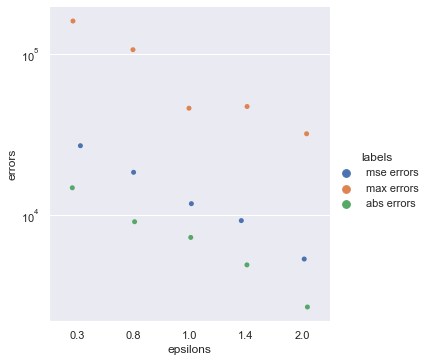

In [20]:
plt_name = 'flat_freq_epsilon'
dict_error_plot_epsilons(epsilon_error_dicts,plt_name, epsilons)

In [ ]:
n_error_dicts = {}
for idx, N in enumerate(n):
    n_error_dicts[N] = same_parameter(ns[idx], correct_answer)



In [ ]:
n_error_dicts

In [ ]:
print(n)
plt_name = 'flat_freq_N'
dict_error_plot_n(n_error_dicts,plt_name, n)